<a href="https://colab.research.google.com/github/neetmadann/neetmadan.github.io/blob/main/ESDA_Chloropleth_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chloropleth Map Comparison of Features

## Import All Packages

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import numpy as np
import os 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import osmnx as ox
import plotly
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import geopandas as gpd
import numpy as np
import os 

import plotly
import plotly.io as pio # to import to show plotly graph
pio.renderers.default='notebook' #import to show plotly graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("white")
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.precision", 4) #Limit display of decimal points

In [ ]:
sns.set_palette("tab10", n_colors=None, desat=None, color_codes=False)

## Area Mapping

In [ ]:
eng_area = pd.read_excel('area_final.xlsx')
eng_area = eng_area.drop(['Unnamed: 0'],axis=1)
#{column: len(eng_area[column].unique()) for column in eng_area.columns}
#eng_area.head()
#eng_area.info(null_counts=True)
eng_area = eng_area.drop({'TCITY15CD','TCITY15NM'},axis=1)

##### Map Data

In [ ]:
MSOA = gpd.read_file('MSOA.geojson')
#MSOA.set_crs('EPSG:27700', allow_override=False)
#MSOA.head()
MSOA = MSOA[MSOA['MSOA11CD'].str[0] =='E']
len(MSOA)

6791

<AxesSubplot: >

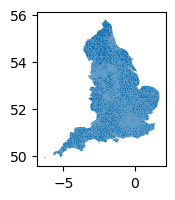

In [ ]:
MSOA.plot(figsize=(2, 2),linewidth=0.01)

## Car ownership Preprocessing
### DFT 2022

In [ ]:
cars = pd.read_csv('car by lsoa.csv',low_memory=False)#specify low memory type false for dtypes of year with mixed data types

cars = cars[cars['LicenceStatus']=='Licensed'] #filter for just licensed cars to be used on roads
cars = cars[cars['BodyType']=='Cars'] #limit to just cars by licensed ownership in England

cars = cars.drop(['BodyType', 'LicenceStatus'],axis=1) #drop unnecessary columns that have been filtered
cars = pd.melt(cars, id_vars=['LSOA11CD', 'LSOA11NM'], var_name='Year-Quarter', value_name='cars') #melt year columns into rows
cars['Year'] = cars['Year-Quarter'].str[0:4] #create Year column
cars['Quarter'] = cars['Year-Quarter'].str[5:7] #create Quarter column
cars = cars[cars['Quarter'].isin(['Q2','Q4'])] #Filter Quarters required
cars = cars.loc[(cars['Year-Quarter'].str.endswith('Q4')) | (cars['Year-Quarter']=='2022 Q2')] #filter for latest data for each year
cars['Year-Quarter'].unique() # check that year quarter chosen is accurate

cols = ['Year', 'cars']
cars[cols] = cars[cols].apply(pd.to_numeric, errors='coerce', axis=1) #change data types for numeric remove errors
cars = cars[['LSOA11CD','LSOA11NM','Year','Quarter','cars']] #keep required columns
cars['Area'] = cars['LSOA11CD'].str[0:2]
cars.loc[cars['LSOA11CD'].str.startswith('E0',na=False),'Country']='England'
cars.loc[cars['LSOA11CD'].str.startswith('95',na=False),'Country'] = 'Northern Ireland'
cars.loc[cars['LSOA11CD'].str.startswith('S0',na=False),'Country'] = 'Scotland'
cars.loc[cars['LSOA11CD'].str.startswith('W0',na=False),'Country'] = 'Wales'
cars.loc[cars['LSOA11CD'].str.startswith('Mi',na=False),'Country'] = 'Other'

##### Exploratory Car Ownership Analysis in United Kingdom, Why we choose England as a Case Study for this research

## Exploratory Spatial Data Analysis (Choropleth Map) ESDA of highly Correlated Features with Car Ownership

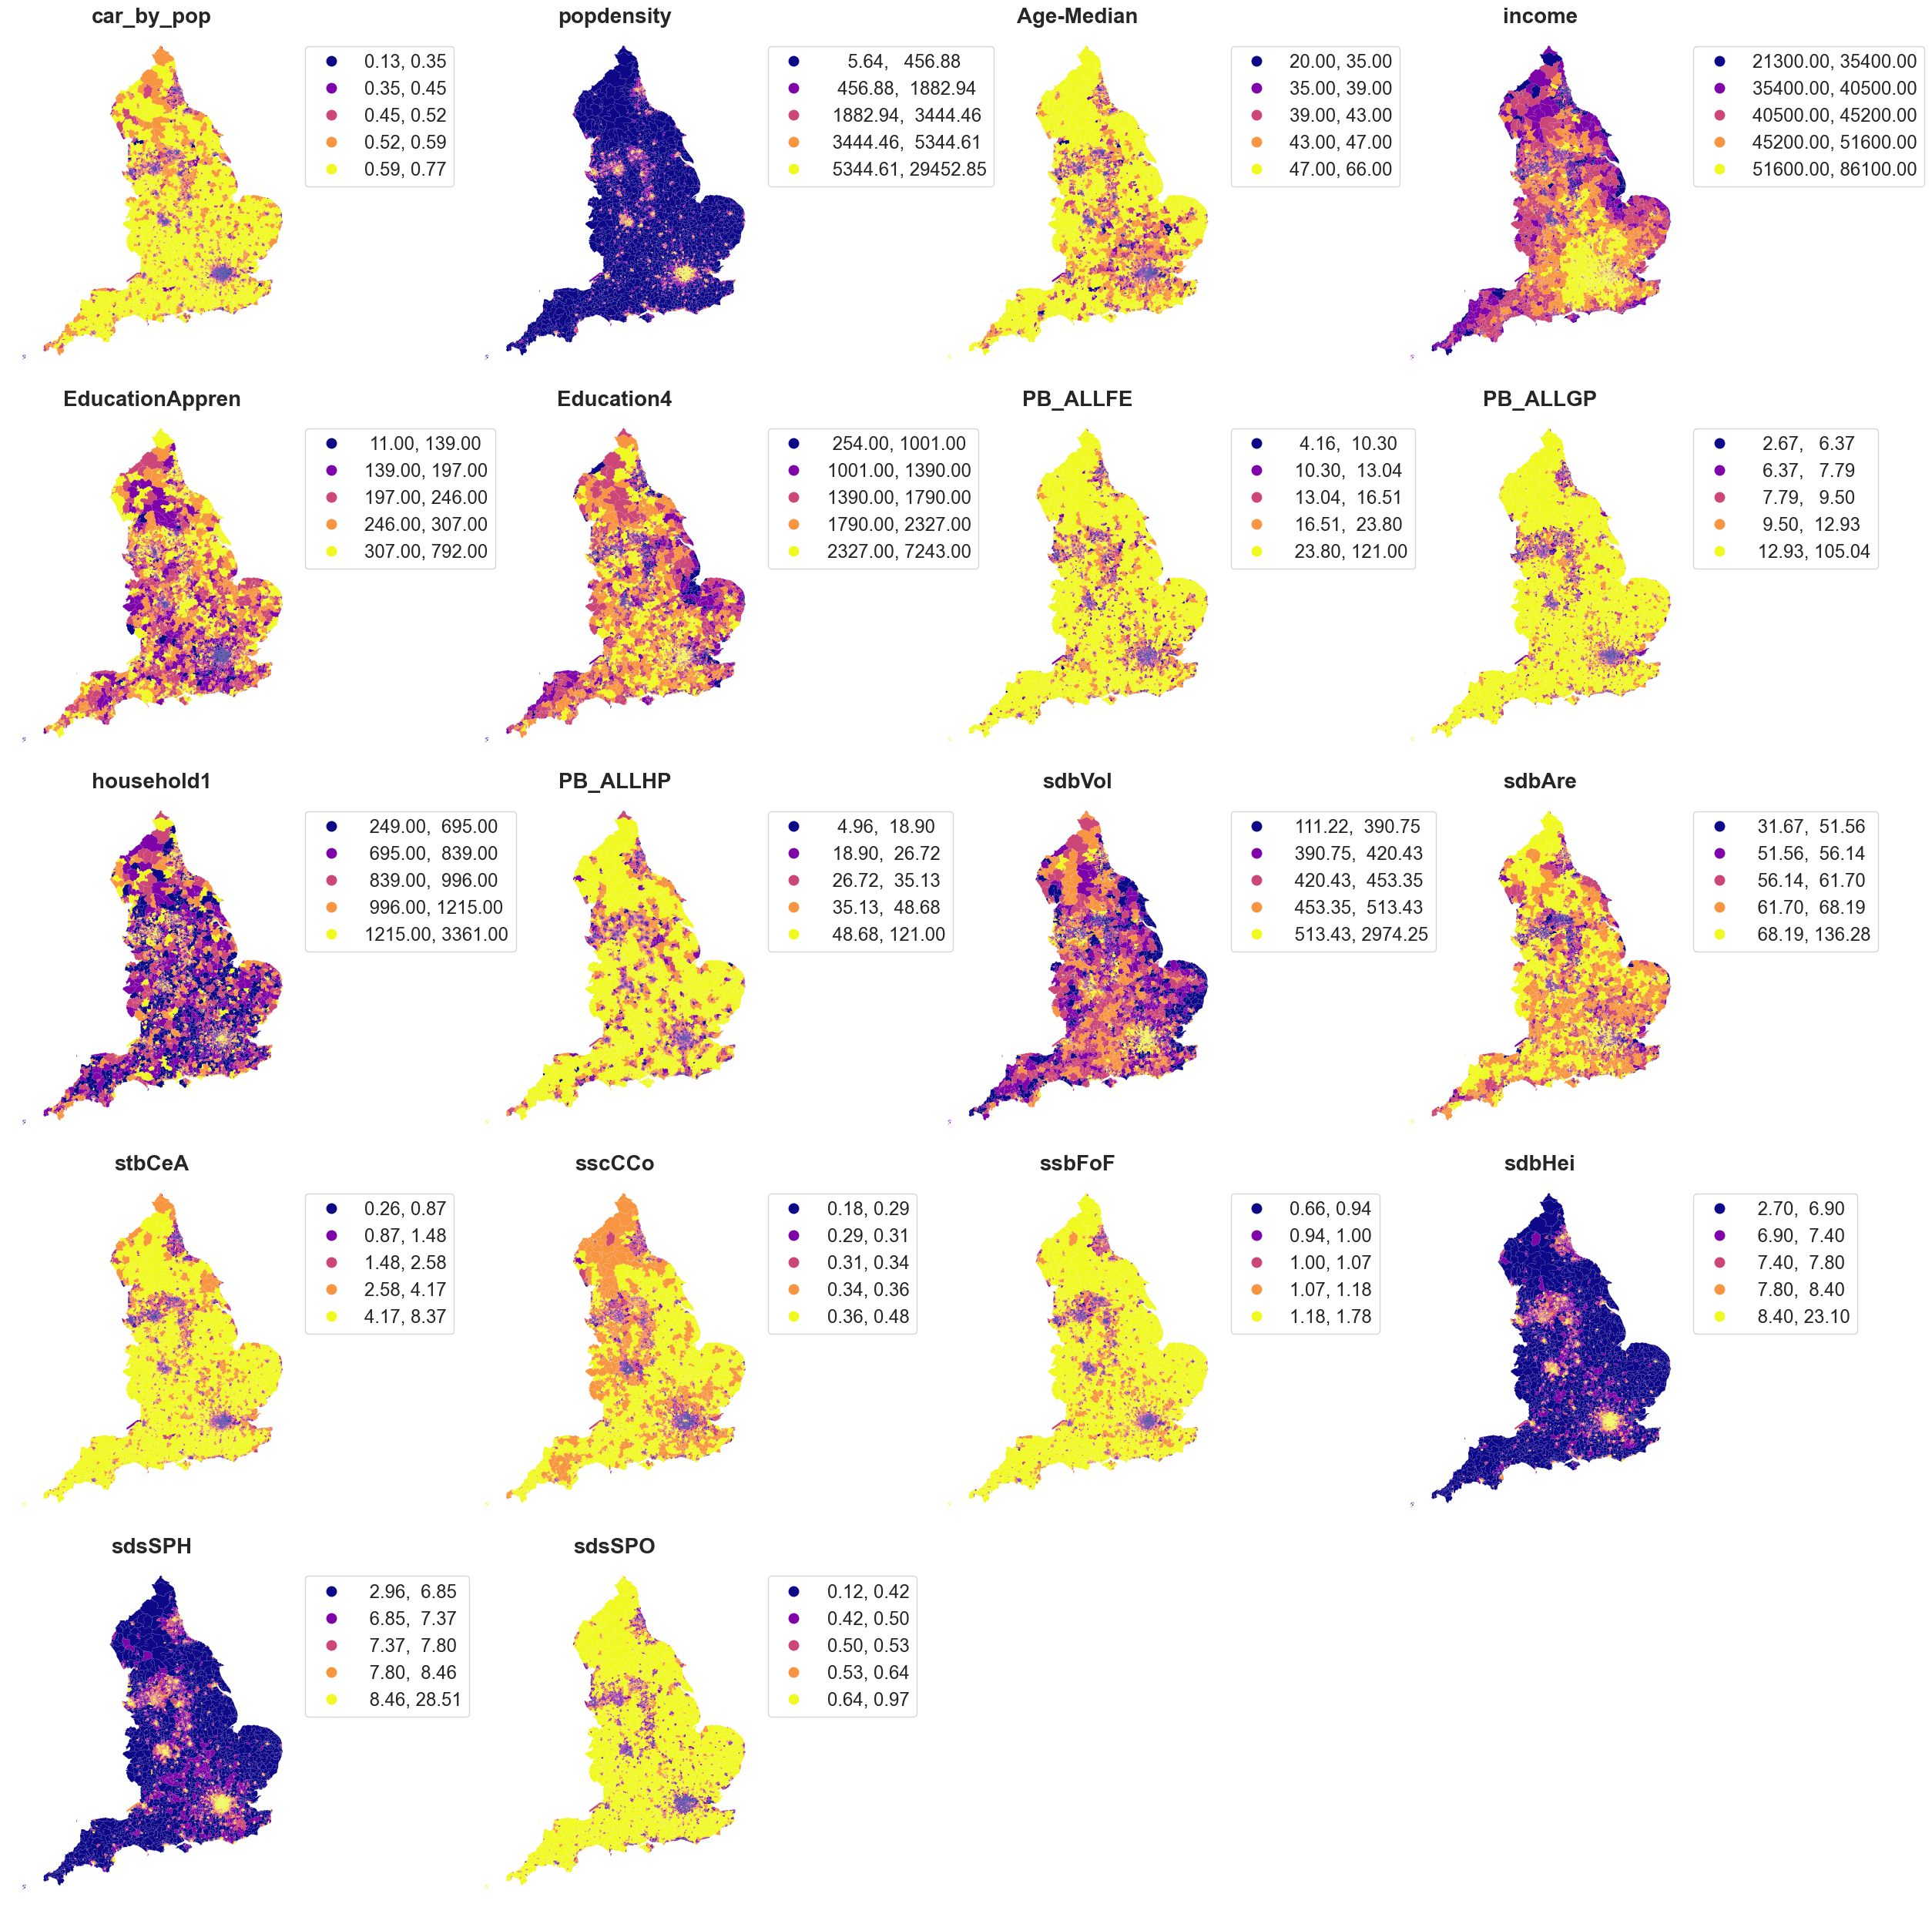

In [ ]:
df_msoa= gpd.GeoDataFrame(df_msoa, geometry='geometry')
p_vars= ['car_by_pop',
 'popdensity',
 'Age-Median',
  'income',
 'EducationAppren',
 'Education4',
 'PB_ALLFE',
 'PB_ALLGP',
'household1',
 'PB_ALLHP','sdbVol','sdbAre',
'stbCeA','sscCCo',
'ssbFoF',
'sdbHei','sdsSPH','sdsSPO']
         
         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    df_msoa.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'x-large'}, scheme='quantiles', cmap='plasma', linewidth=0.01,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

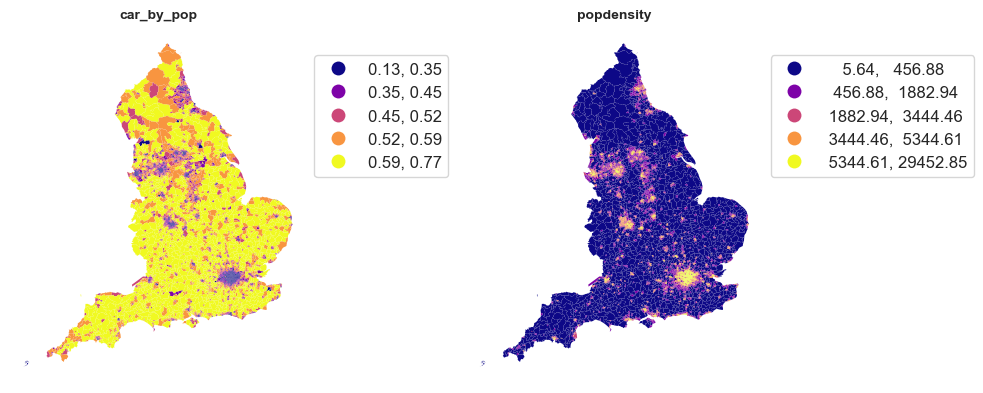

In [ ]:
df_msoa= gpd.GeoDataFrame(df_msoa, geometry='geometry')
p_vars= ['car_by_pop',
 'popdensity']
         
         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  2 #nt(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    df_msoa.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'medium'}, scheme='quantiles', cmap='plasma', linewidth=0.01,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

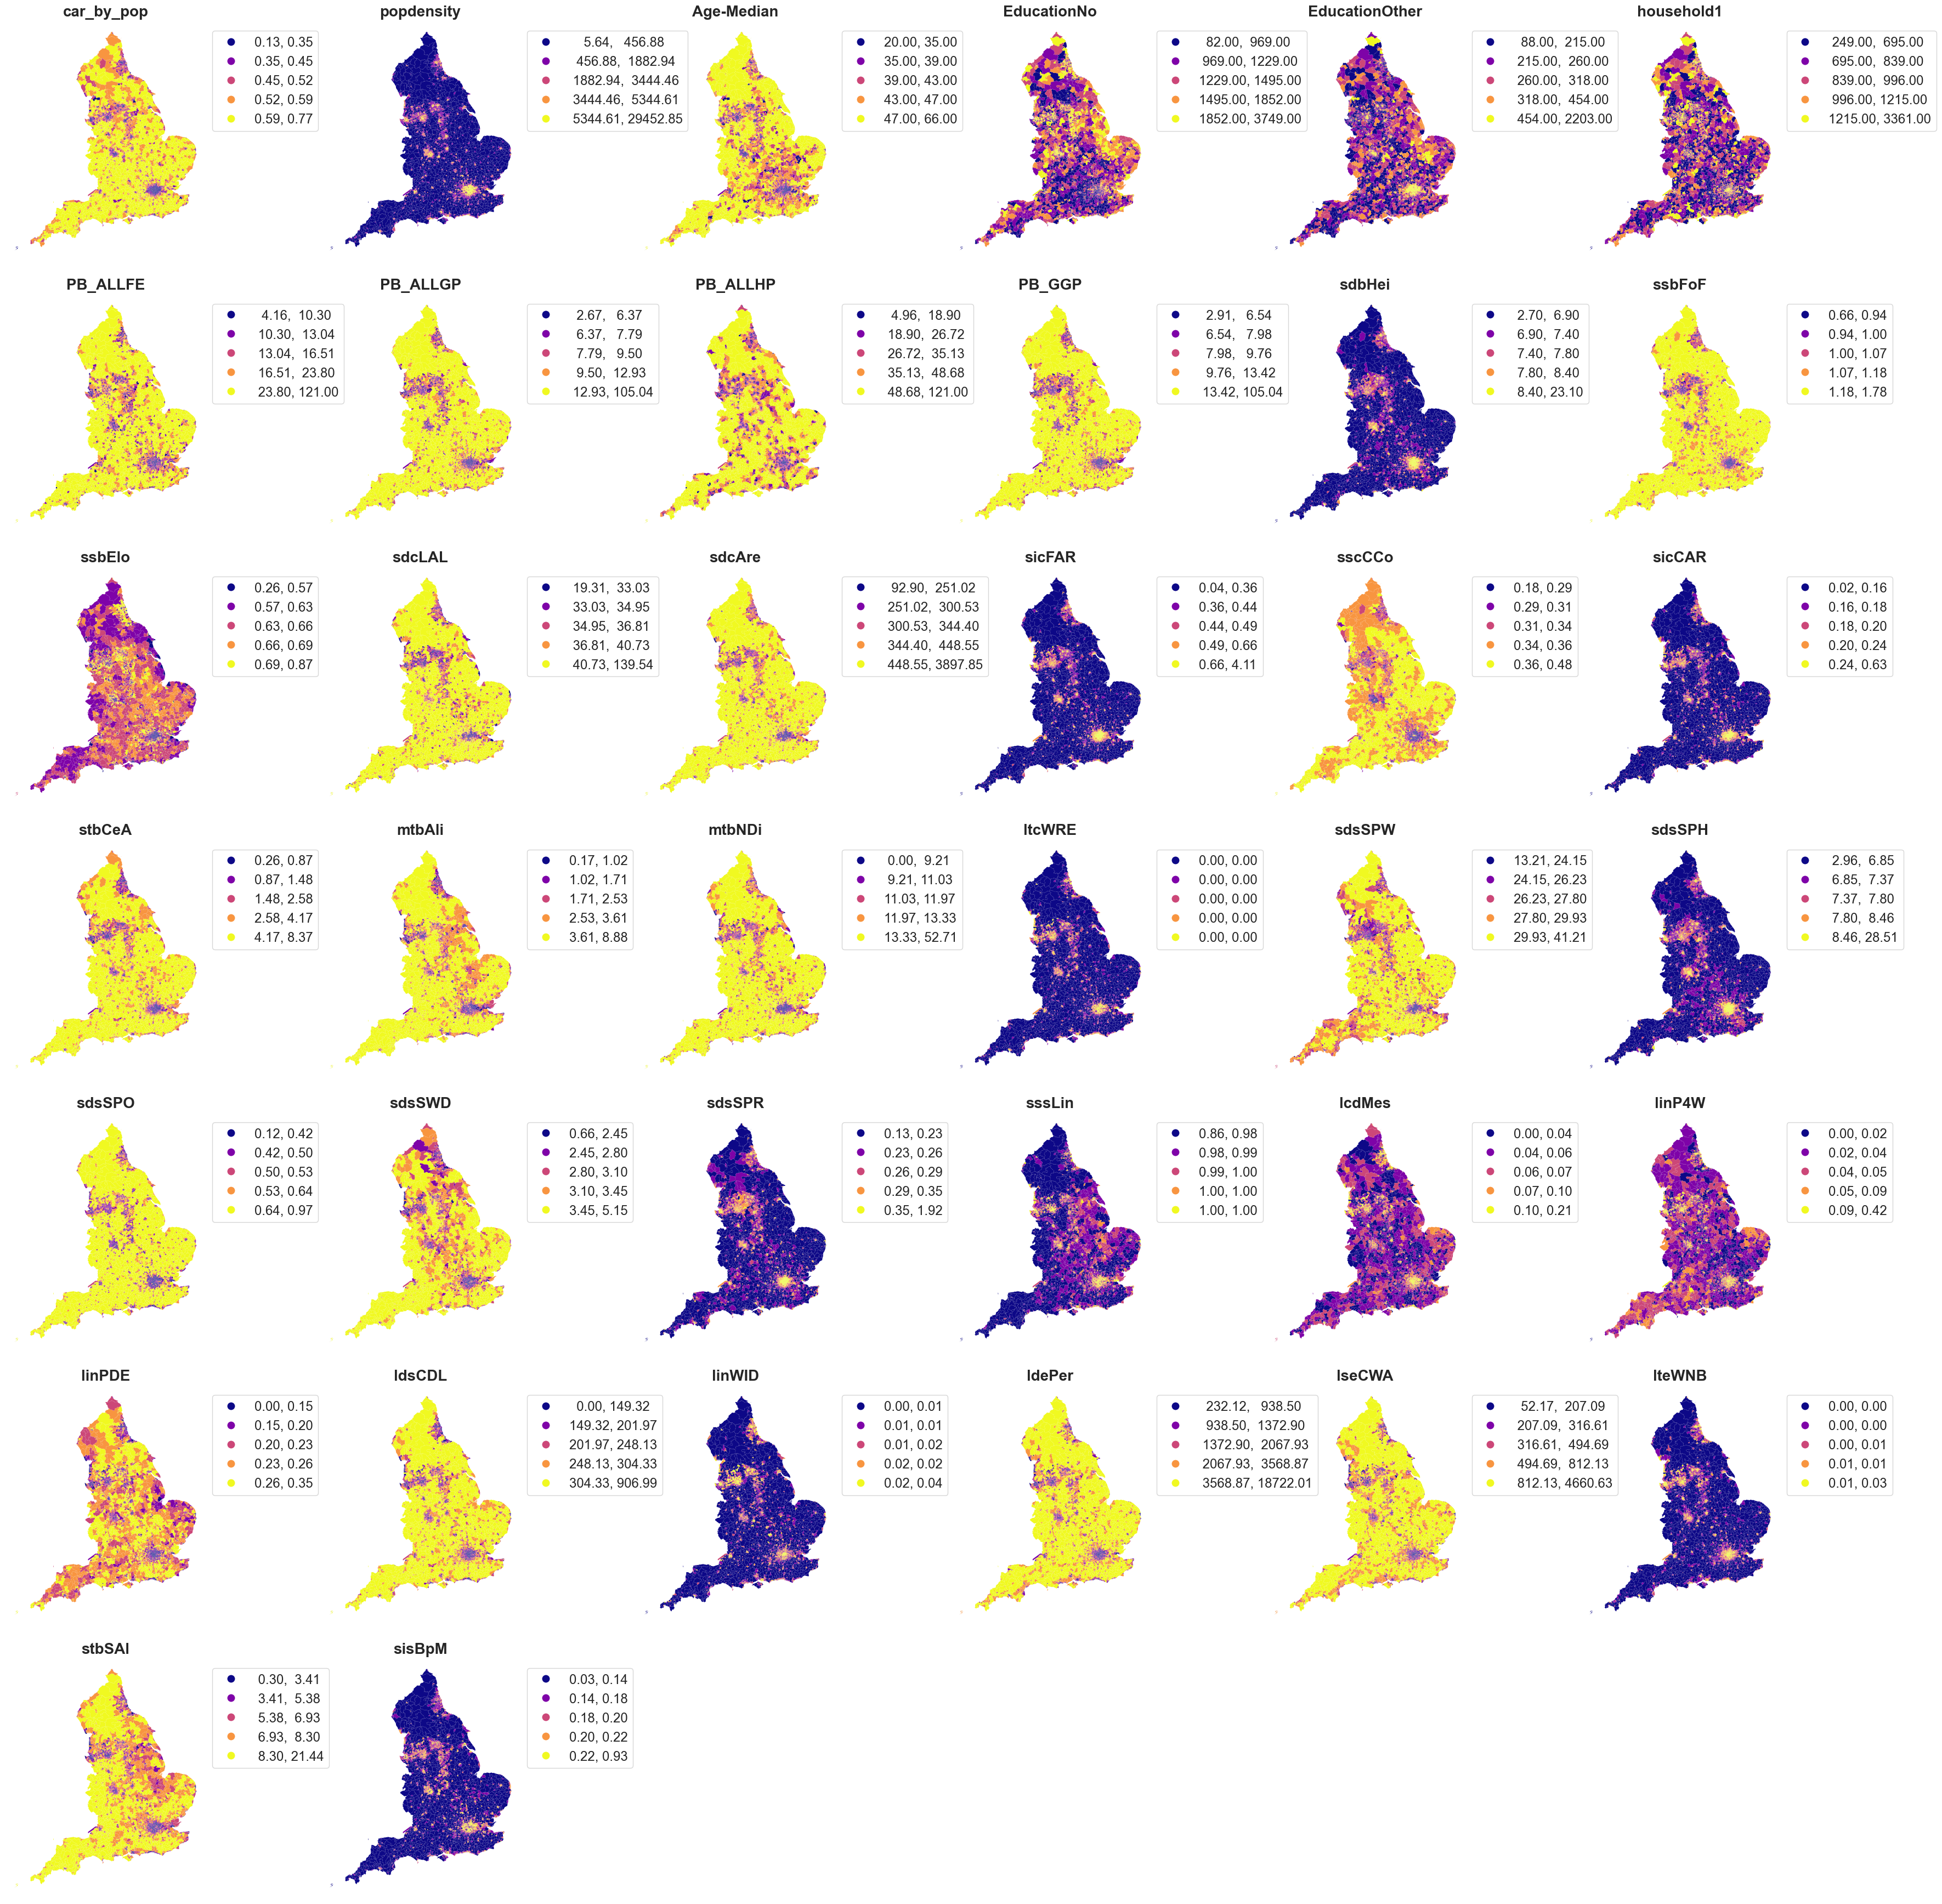

In [ ]:
#same features as esda_selectedfeatures with features that have higher correlation and significant value against car by pop

df_msoa= gpd.GeoDataFrame(df_msoa, geometry='geometry')
p_vars= [
'car_by_pop',
 'popdensity',
 'Age-Median',
 'EducationNo',
 'EducationOther',
'household1',
 'PB_ALLFE',
 'PB_ALLGP',
 'PB_ALLHP',
 'PB_GGP',
 'sdbHei',
 'ssbFoF',
 'ssbElo',
 'sdcLAL',
 'sdcAre',
 'sicFAR',
 'sscCCo',
 'sicCAR',
 'stbCeA',
 'mtbAli',
 'mtbNDi',
 'ltcWRE',
 'sdsSPW',
 'sdsSPH',
 'sdsSPO',
 'sdsSWD',
 'sdsSPR',
 'sssLin',
 'lcdMes',
 'linP4W',
 'linPDE',
 'ldsCDL',
 'linWID',
 'ldePer',
 'lseCWA',
 'lteWNB',
 'stbSAl',
 'sisBpM']
         
         
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

n_plots = len(p_vars)
# compute the number of rows and columns
n_cols =  int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))

# setup the plot
gs = gridspec.GridSpec(n_rows, n_cols)
scale = max(n_cols, n_rows)
fig = plt.figure(figsize=(5 * scale, 5 * scale))

# loop through each subplot and plot values there
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    df_msoa.plot(column = p_vars[i],ax=ax,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5,0.5, 0.5),'fmt':"{:.2f}",'fontsize':'x-large'}, scheme='quantiles', cmap='plasma', linewidth=0.01,)
    ax.set_title(p_vars[i], fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.axis('off')
gs.tight_layout(fig, rect=[0, 0, 1.0, 1.0])

